# Bagian Baru

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

In [ ]:
dataset = pd.read_csv('Iris.csv')

print('Sample Data:')
dataset.head()

Sample Data:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
dataset.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [ ]:
x = dataset.iloc[:, :4]
y = dataset['variety']
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3,random_state=0)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [ ]:
print('Decision Tree Accuracy: {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decision Tree Accuracy: 0.978


[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

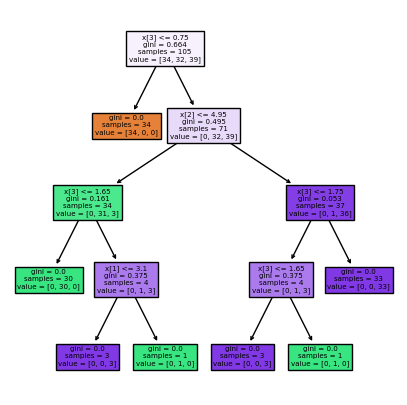

In [ ]:
plt.figure(figsize=(5, 5))
tree.plot_tree(dt, filled=True)

In [ ]:
kMeans = KMeans(n_clusters=3)
labels = kMeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
db_score = davies_bouldin_score(x, labels)
print(db_score)

0.6619715465007465


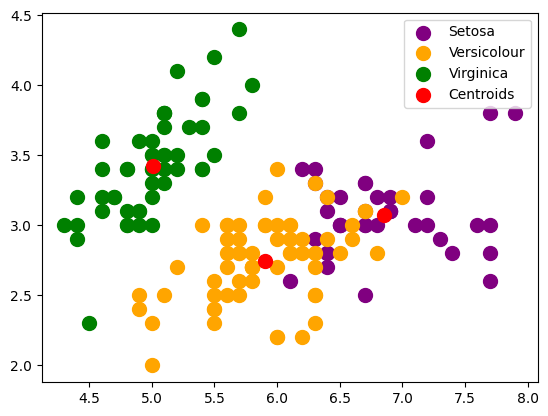

In [ ]:
cols = dataset.columns
plt.scatter(x.loc[labels == 0, cols[0]],
            x.loc[labels == 0, cols[1]],
            s=100, c='purple',
            label='Setosa')
plt.scatter(x.loc[labels == 1, cols[0]],
            x.loc[labels == 1, cols[1]],
            s=100, c='orange',
            label='Versicolour')
plt.scatter(x.loc[labels == 2, cols[0]],
            x.loc[labels == 2, cols[1]],
            s=100, c='green',
            label='Virginica')
plt.scatter(kMeans.cluster_centers_[:, 0],
            kMeans.cluster_centers_[:, 1],
            s=100, c='red',
            label='Centroids')

plt.legend()
